## Train_test_split

In [114]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data      # Feature set
y = iris.target    # label set

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

## KNeighborsClassifier

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


## Classification Accuracy

In [120]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


#### Null accuracy: accuracy that could be achieved by always predicting the most frequent class

In [125]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([12, 14, 12]))

## Confusion Matrix

In [128]:
metrics.confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0, 12,  2],
       [ 0,  0, 12]])

![Large confusion matrix](images/ConfusionMatrix-propTrue.png)

#### Classification Accuracy: how often is the classifier correct

In [131]:
print(metrics.accuracy_score(y_test, y_pred))

0.9473684210526315


#### Classification Error: how often is the classifier incorrect

In [133]:
print(1 - metrics.accuracy_score(y_test, y_pred))

0.052631578947368474


#### See more on Sensitivity, Specificity, and adjusting the classification threshold, as well as ROC & AUC on Binary Classification problems.

## LogisticRegression

In [127]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Linear Regression

In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/Advertising.csv', index_col=0)
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

#### Interpretations

In [62]:
print(linreg.intercept_)
print(linreg.coef_)
list(zip(feature_cols, linreg.coef_))

2.87696662231793
[0.04656457 0.17915812 0.00345046]


[('TV', 0.046564567874150295),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.0034504647111804343)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

#### Visualizing linear regression

/Users/potatorun/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


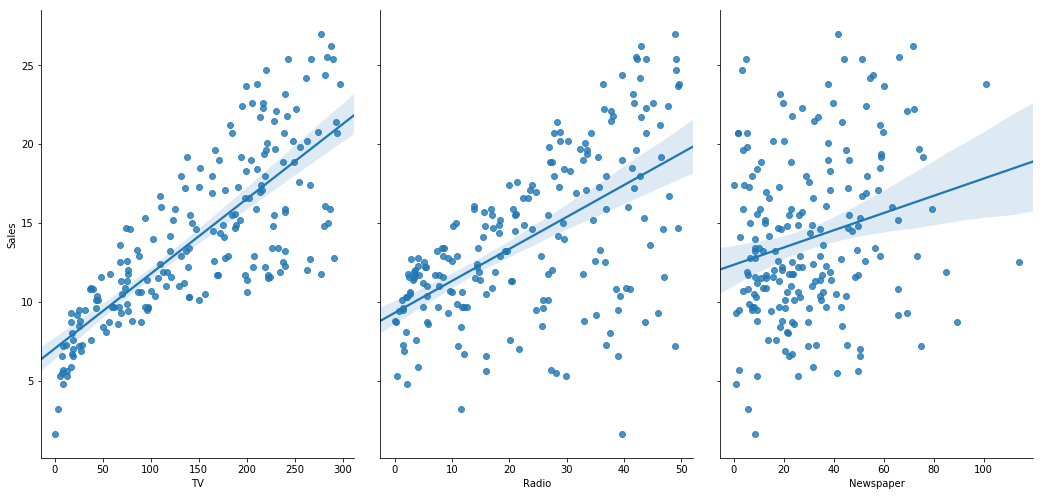

In [52]:
import seaborn as sns
%matplotlib inline
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Model evaluation metrics for regression

In [64]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

#### Mean Absolute Error (MAE)

In [65]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


#### Mean Squred Error (MSE)

In [66]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


#### Root Mean Squred Error (RMSE)

In [67]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

## K-Fold Cross-validation

In [83]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

data = pd.read_csv('data/Advertising.csv', index_col=0)

X = data[['TV', 'Radio', 'Newspaper']]
y = data.Sales

lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring ='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(rmse_scores)



[1.88689808 1.81595022 1.44548731 1.68069713 1.14139187 1.31971064
 2.85891276 1.45399362 1.7443426  1.56614748]


## GridSearchCV

In [96]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target


#### Searching for optimal tuning parameters

In [100]:
k_range = list(range(1,31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors = k_range, weights = weight_options)

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid.fit(X, y)
pd.DataFrame(grid.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.000939,0.000322,0.001930,0.000777,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",1.000000,0.933333,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000822,0.000630,0.001493,0.000739,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",1.000000,0.933333,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.000836,0.000934,0.001726,0.001750,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",1.000000,0.933333,1.0,...,0.977778,0.985185,0.977778,0.970370,0.985185,0.977778,0.977778,0.977778,0.978519,0.005185
3,0.000670,0.000391,0.001104,0.000397,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",1.000000,0.933333,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.000450,0.000077,0.000838,0.000149,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",1.000000,0.933333,1.0,...,0.955556,0.962963,0.977778,0.955556,0.970370,0.955556,0.955556,0.955556,0.960741,0.007444
5,0.000459,0.000091,0.000906,0.000245,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",1.000000,0.933333,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.000405,0.000038,0.000980,0.000466,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",1.000000,0.933333,1.0,...,0.955556,0.962963,0.977778,0.962963,0.970370,0.962963,0.955556,0.970370,0.963704,0.006988
7,0.001889,0.002924,0.000989,0.000474,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",1.000000,0.933333,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.000422,0.000013,0.001017,0.000417,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",1.000000,0.933333,1.0,...,0.962963,0.970370,0.985185,0.962963,0.977778,0.962963,0.962963,0.970370,0.968889,0.007258
9,0.000434,0.000022,0.000908,0.000150,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",1.000000,0.933333,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [102]:
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


#### RandomizedSearchCV

In [106]:
from sklearn.model_selection import RandomizedSearchCV

rand = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
rand.fit(X, y)
pd.DataFrame(rand.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000373,0.000132,0.000673,0.000146,distance,16,"{'weights': 'distance', 'n_neighbors': 16}",1.000000,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.000000,1.0,1.0,0.973333,0.032660,2
1,0.000475,0.000066,0.000821,0.000077,uniform,22,"{'weights': 'uniform', 'n_neighbors': 22}",0.933333,0.933333,1.0,1.000000,1.000000,0.933333,0.933333,0.933333,1.0,1.0,0.966667,0.033333,7
2,0.000419,0.000057,0.000780,0.000095,uniform,18,"{'weights': 'uniform', 'n_neighbors': 18}",1.000000,0.933333,1.0,1.000000,1.000000,0.933333,0.933333,1.000000,1.0,1.0,0.980000,0.030551,1
3,0.000587,0.000089,0.001085,0.000115,uniform,27,"{'weights': 'uniform', 'n_neighbors': 27}",0.933333,0.933333,1.0,1.000000,1.000000,0.866667,0.933333,1.000000,1.0,1.0,0.966667,0.044721,7
4,0.000346,0.000110,0.000692,0.000250,uniform,29,"{'weights': 'uniform', 'n_neighbors': 29}",0.933333,0.933333,1.0,0.933333,1.000000,0.866667,0.933333,0.933333,1.0,1.0,0.953333,0.042687,10
5,0.000267,0.000015,0.000512,0.000041,distance,10,"{'weights': 'distance', 'n_neighbors': 10}",1.000000,0.933333,1.0,1.000000,0.933333,0.933333,0.933333,1.000000,1.0,1.0,0.973333,0.032660,2
6,0.000324,0.000110,0.000613,0.000177,distance,22,"{'weights': 'distance', 'n_neighbors': 22}",1.000000,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,7
7,0.000291,0.000075,0.000495,0.000071,uniform,14,"{'weights': 'uniform', 'n_neighbors': 14}",1.000000,0.933333,1.0,1.000000,1.000000,0.866667,0.933333,1.000000,1.0,1.0,0.973333,0.044222,2
8,0.000266,0.000018,0.000503,0.000023,distance,12,"{'weights': 'distance', 'n_neighbors': 12}",1.000000,0.933333,1.0,1.000000,0.866667,1.000000,0.933333,1.000000,1.0,1.0,0.973333,0.044222,2
9,0.000256,0.000003,0.000480,0.000036,uniform,15,"{'weights': 'uniform', 'n_neighbors': 15}",0.933333,0.933333,1.0,1.000000,1.000000,0.933333,0.933333,1.000000,1.0,1.0,0.973333,0.032660,2


In [107]:
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}
